In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
data = pd.read_csv("../files/concrete_data.csv")

In [4]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# checking missing values

data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [10]:
# checking if data contains 0 or -ve numbers 
# if the data contains 0 or -ve numbers we cannot implement Box-Cox 

data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Training the model without transformation**

In [13]:
X = data.drop(columns=["Strength"])
y = data.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10,
)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred=y_pred)

0.6232763845604509

In [27]:
# cross checking with the cross val score
lr2 = LinearRegression()
np.mean(cross_val_score(lr2, X, y, scoring="r2", cv=4))

np.float64(0.4033018591311871)

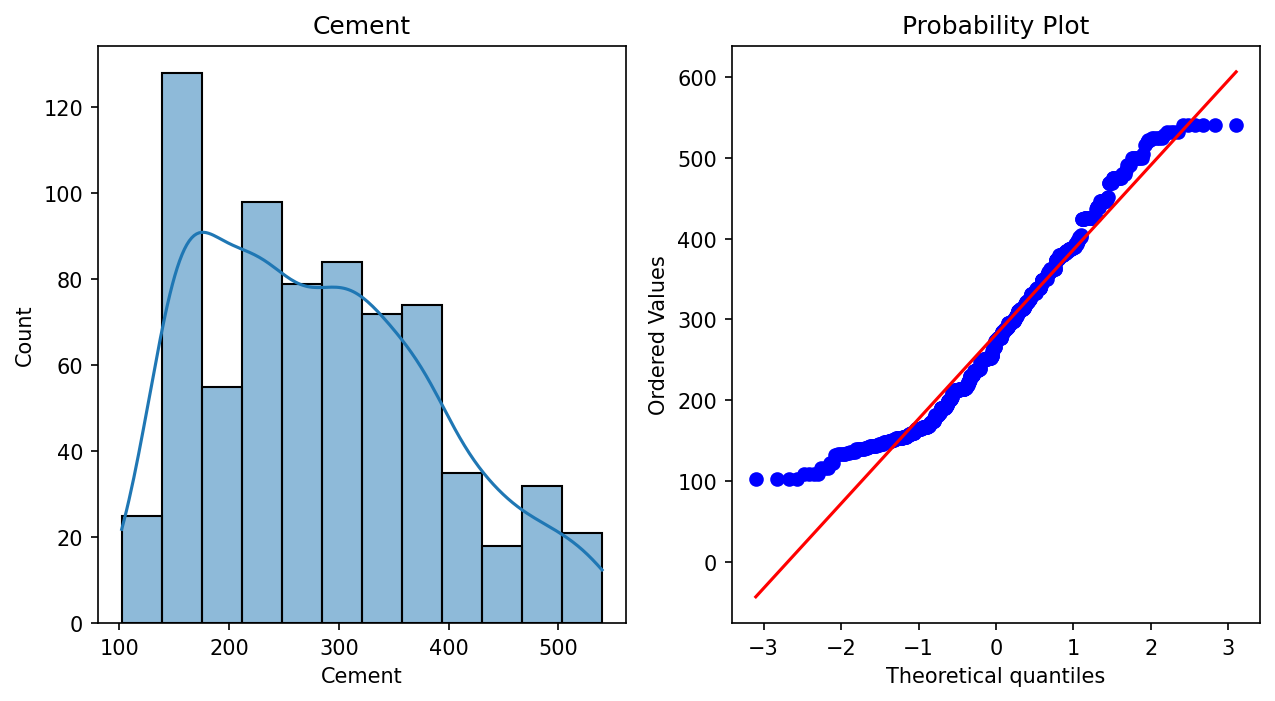

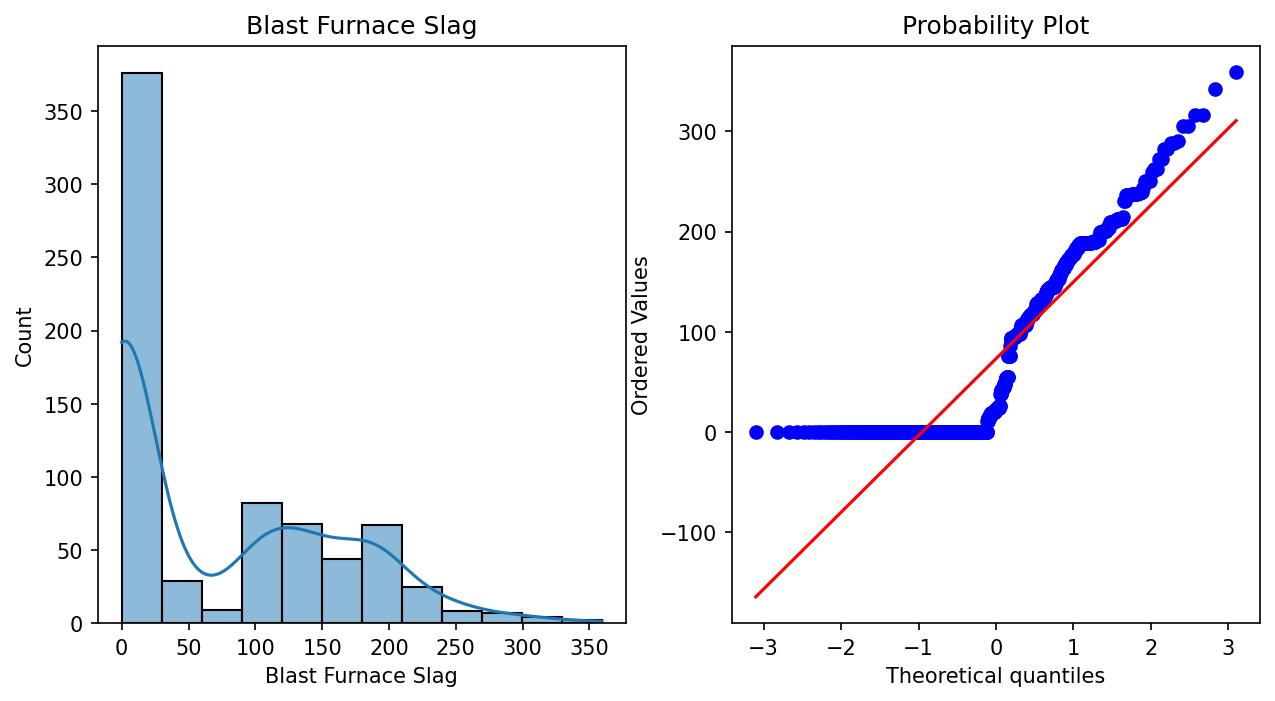

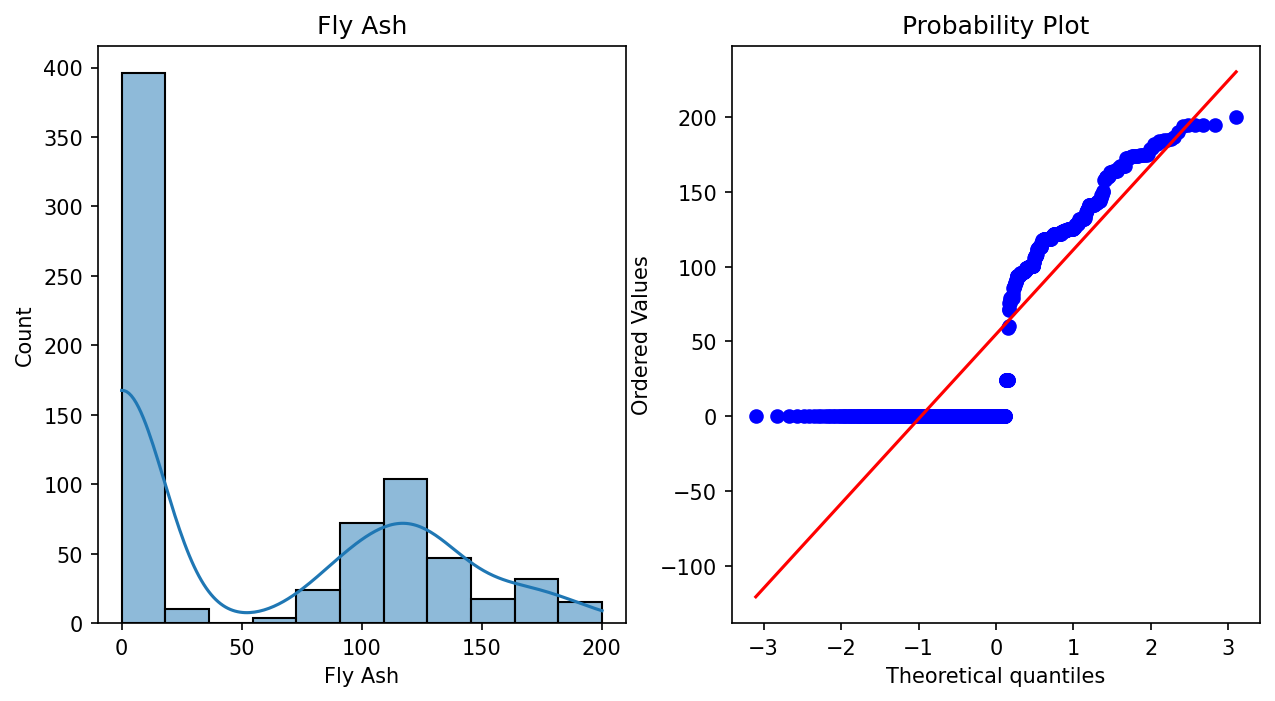

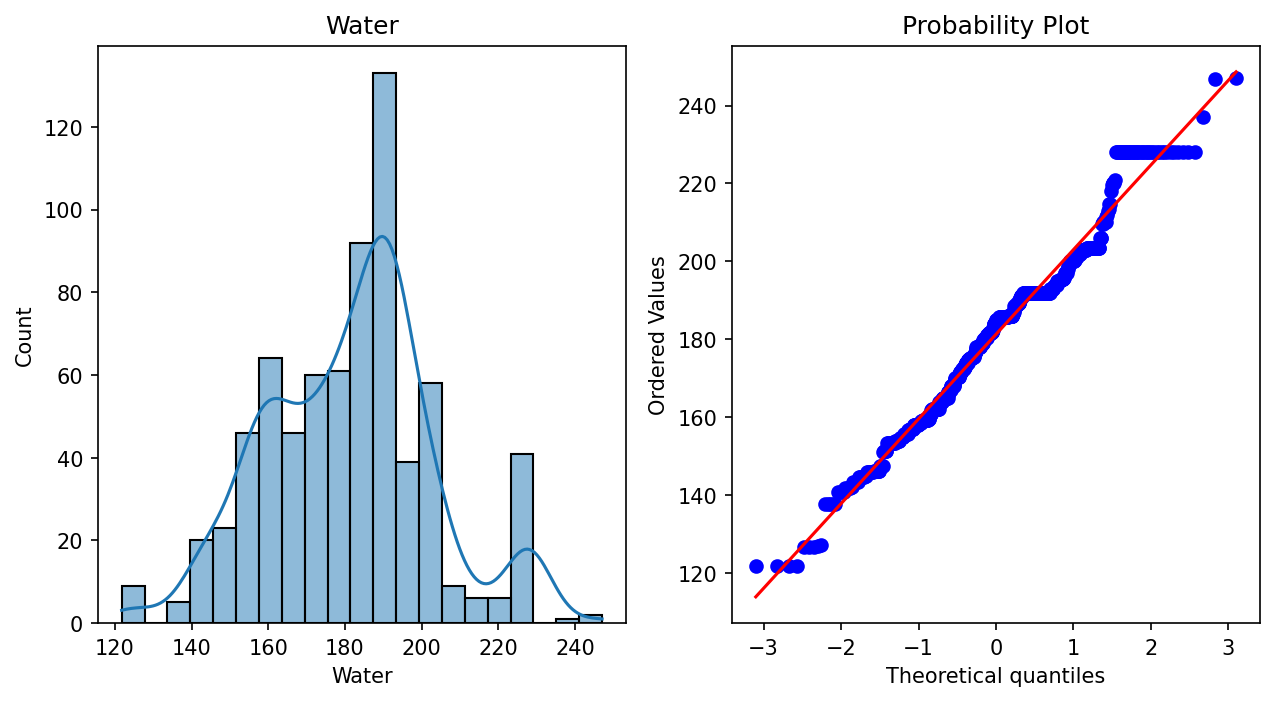

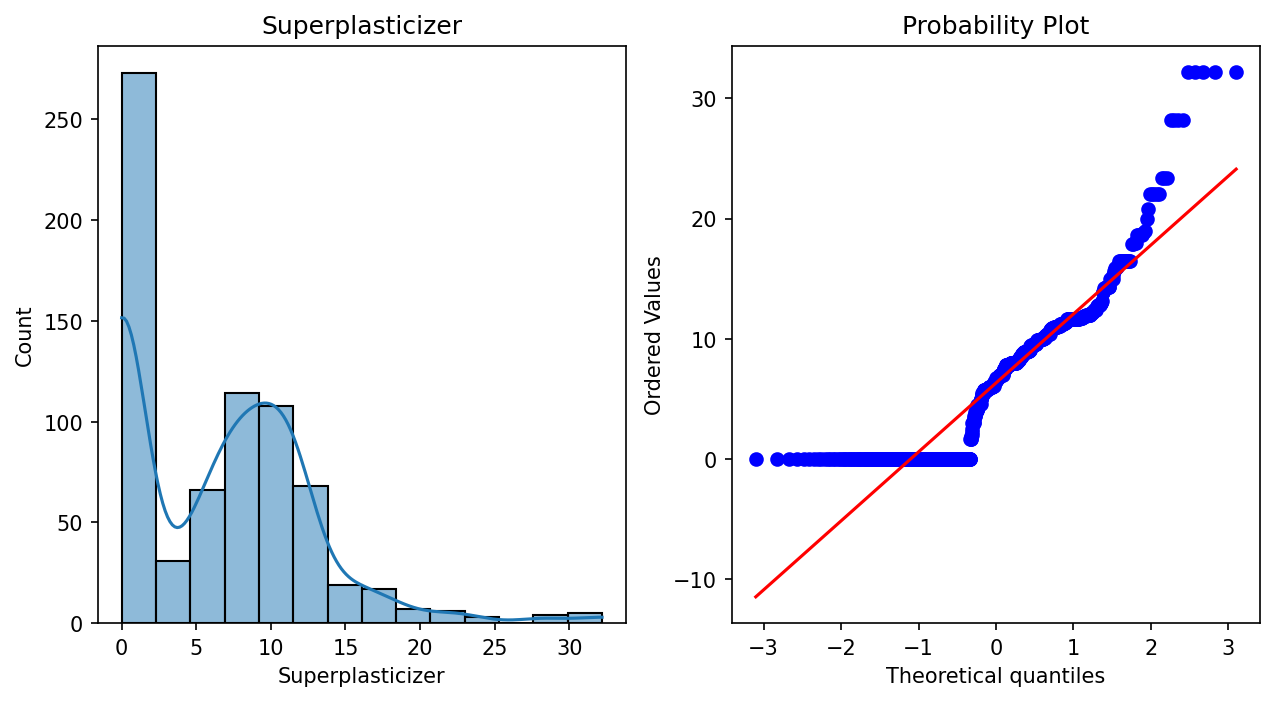

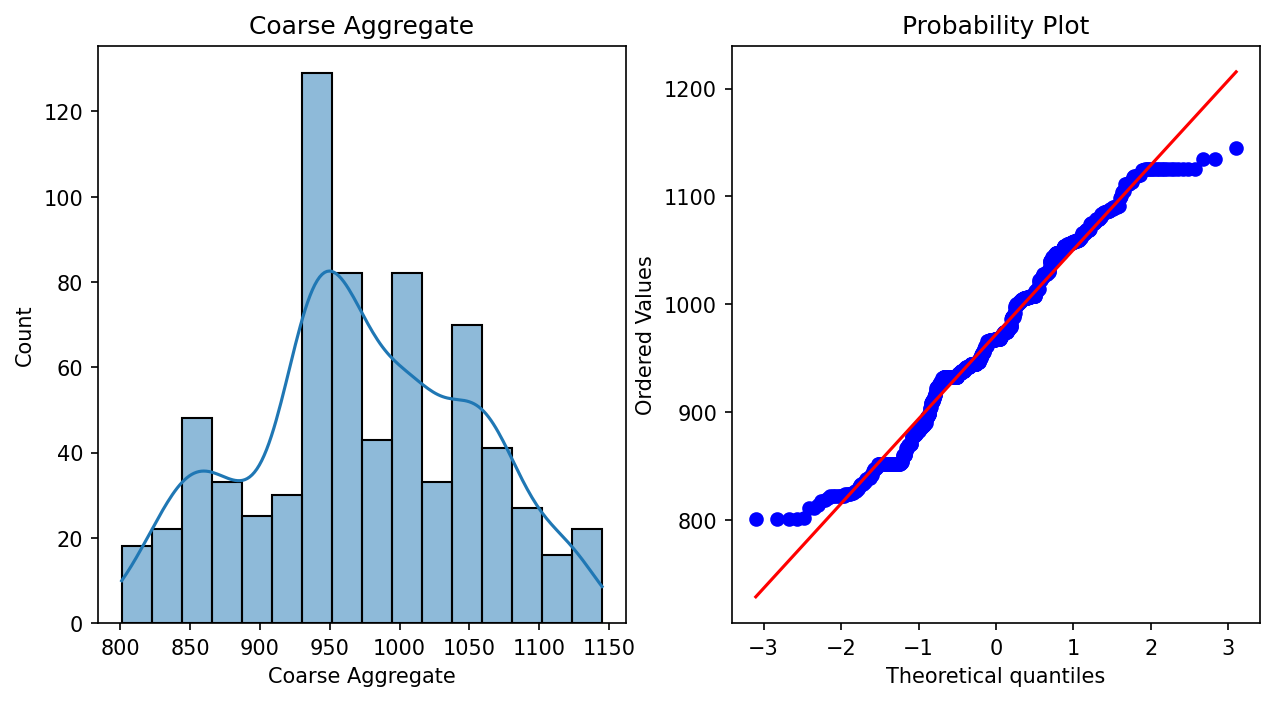

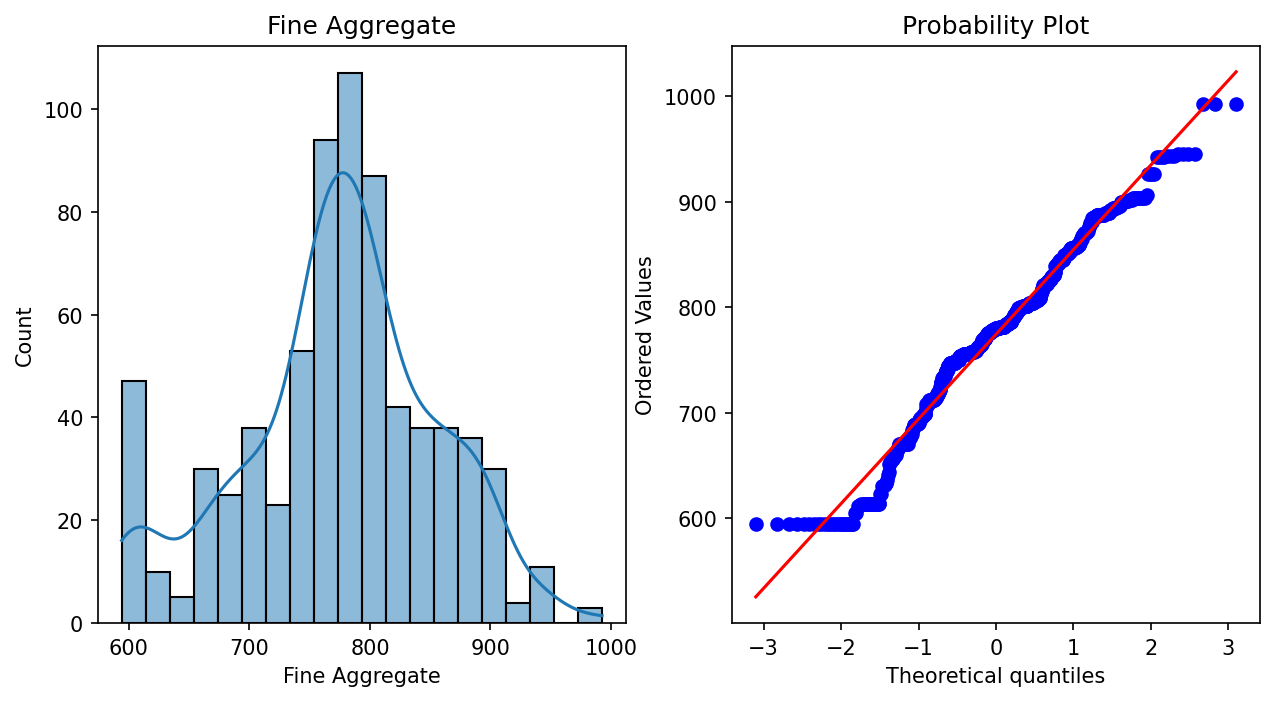

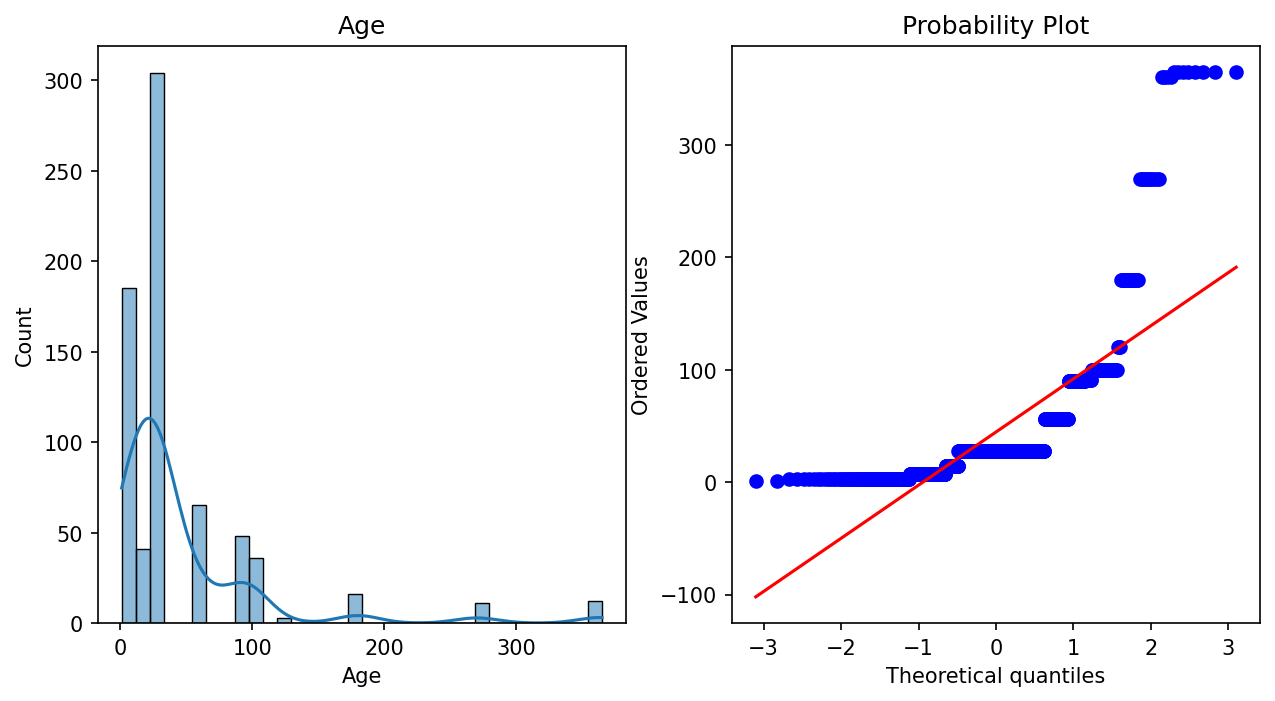

In [28]:
# cheking the distribution of data

for col in X_train.columns:
    plt.figure(figsize=(10, 5), dpi=150)
    plt.subplot(121)
    plt.title(col)
    sns.histplot(X_train[col], kde=True)

    plt.subplot(122)
    plt.title(col)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.show()

In [30]:
# Applying Box-Cox transform

box_cox_transformer = PowerTransformer(
    method="box-cox"
)  # STandardization occurs by default

X_train_transformed = box_cox_transformer.fit_transform(X_train + 0.00001)
X_test_transformed = box_cox_transformer.transform(X_test + 0.00001)

In [31]:
# Applying linear regression in tranformed data

lr_transformed = LinearRegression()
lr_transformed.fit(X_train_transformed, y_train)

y_pred = lr_transformed.predict(X_test_transformed)

r2_score(y_test, y_pred=y_pred)

0.8094623094950651

In [32]:
# cross val score
box_cox_transformer_2 = PowerTransformer(method="box-cox")

X_transformed = box_cox_transformer_2.fit_transform(X + 0.00001)

lr3 = LinearRegression()

np.mean(cross_val_score(lr3, X_transformed, y, scoring="r2"))

np.float64(0.666848966398744)

In [34]:
# converting numpy array into dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X.columns)

**QQ plots of columns before and after Transformation**

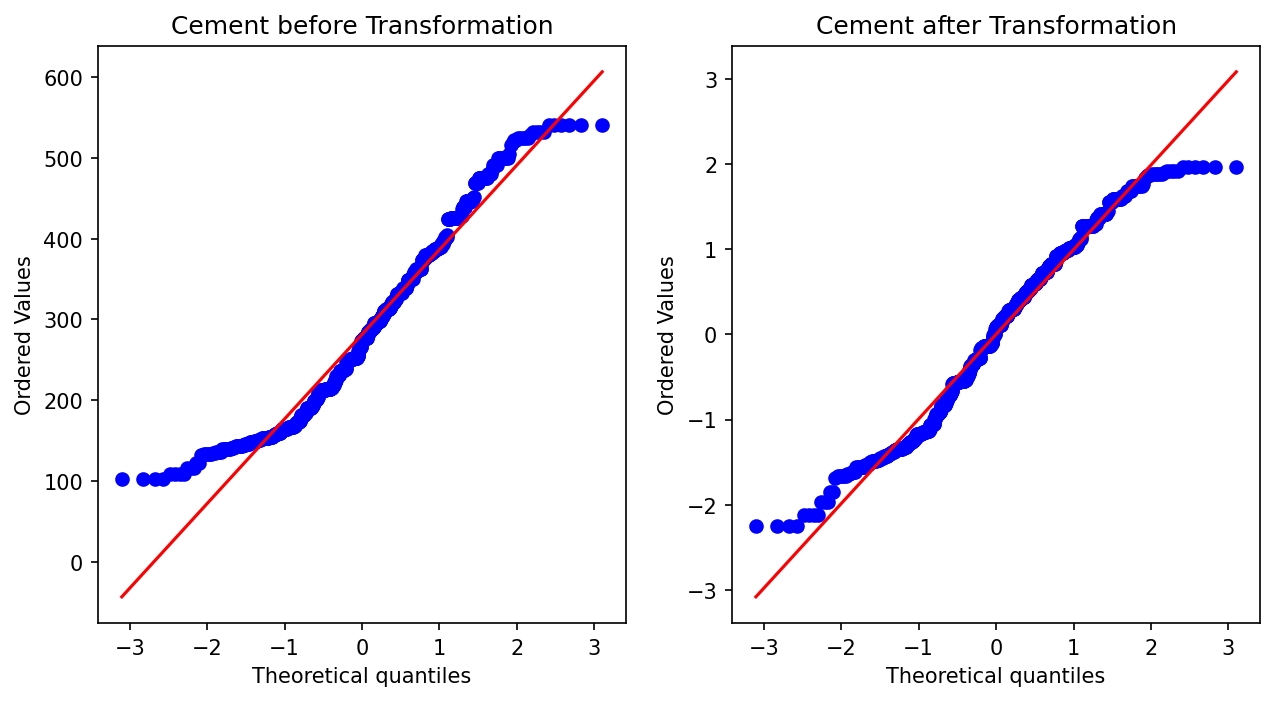

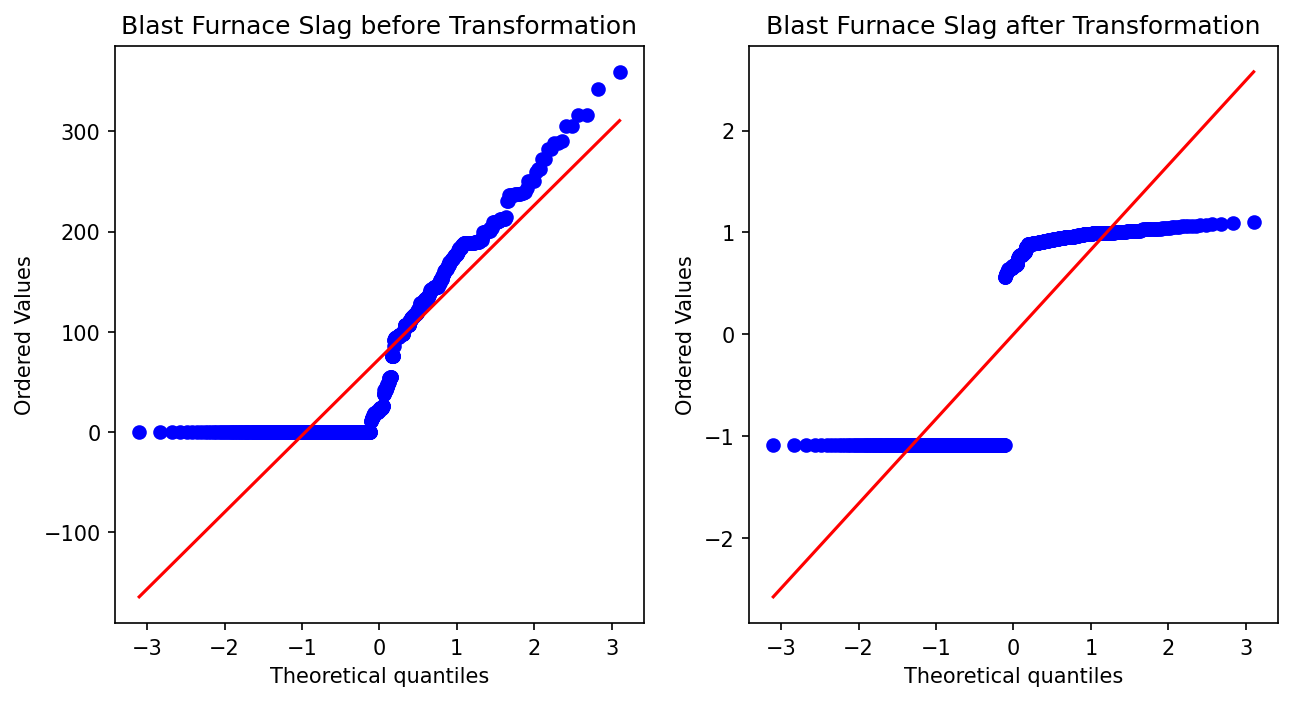

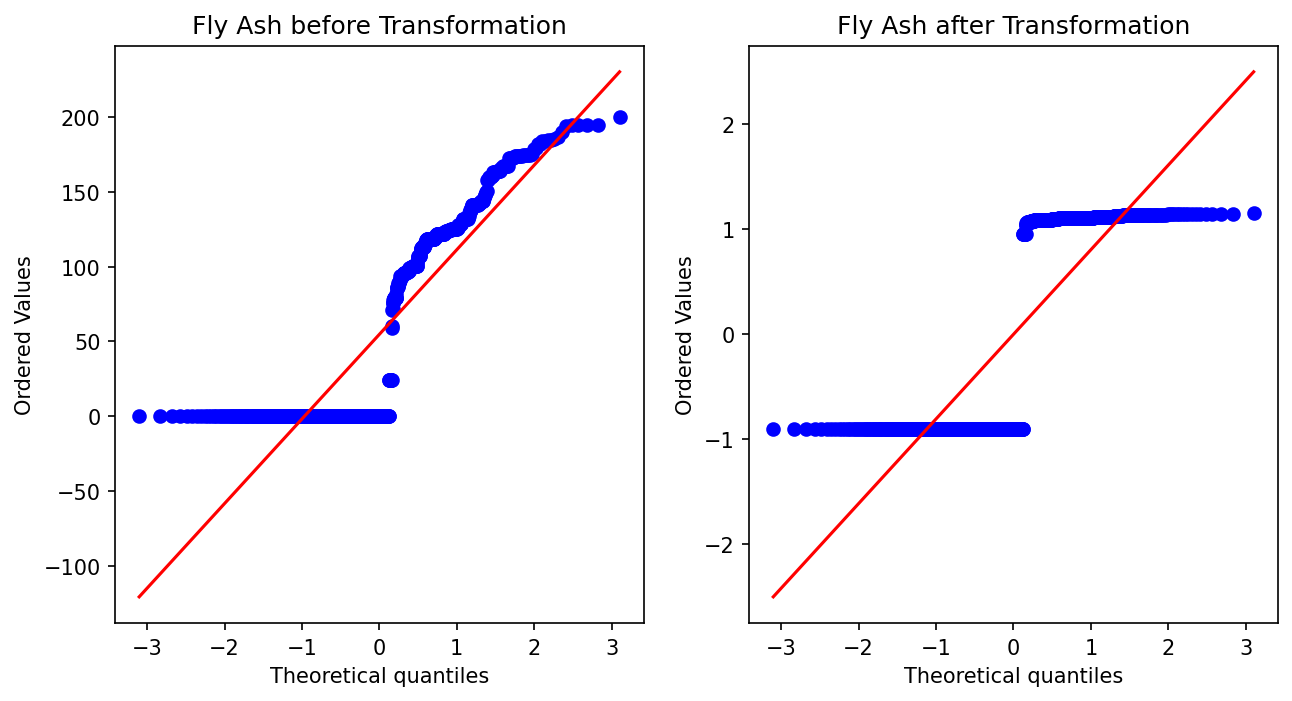

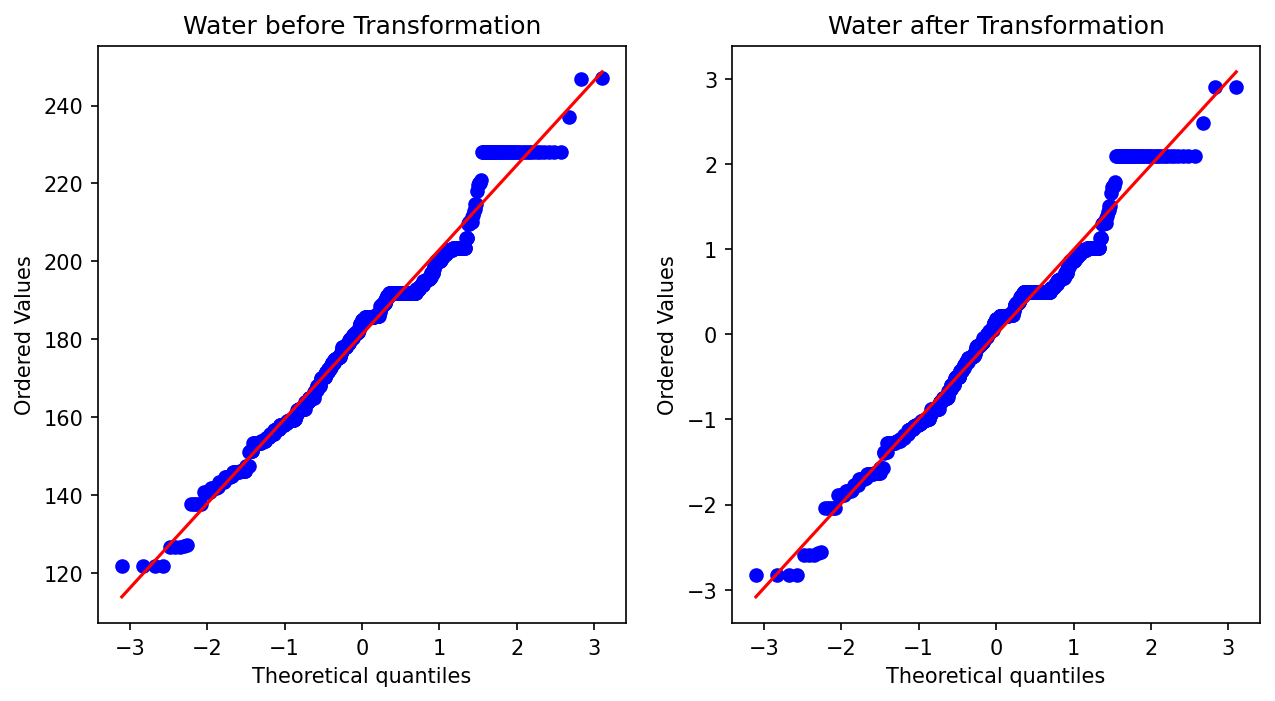

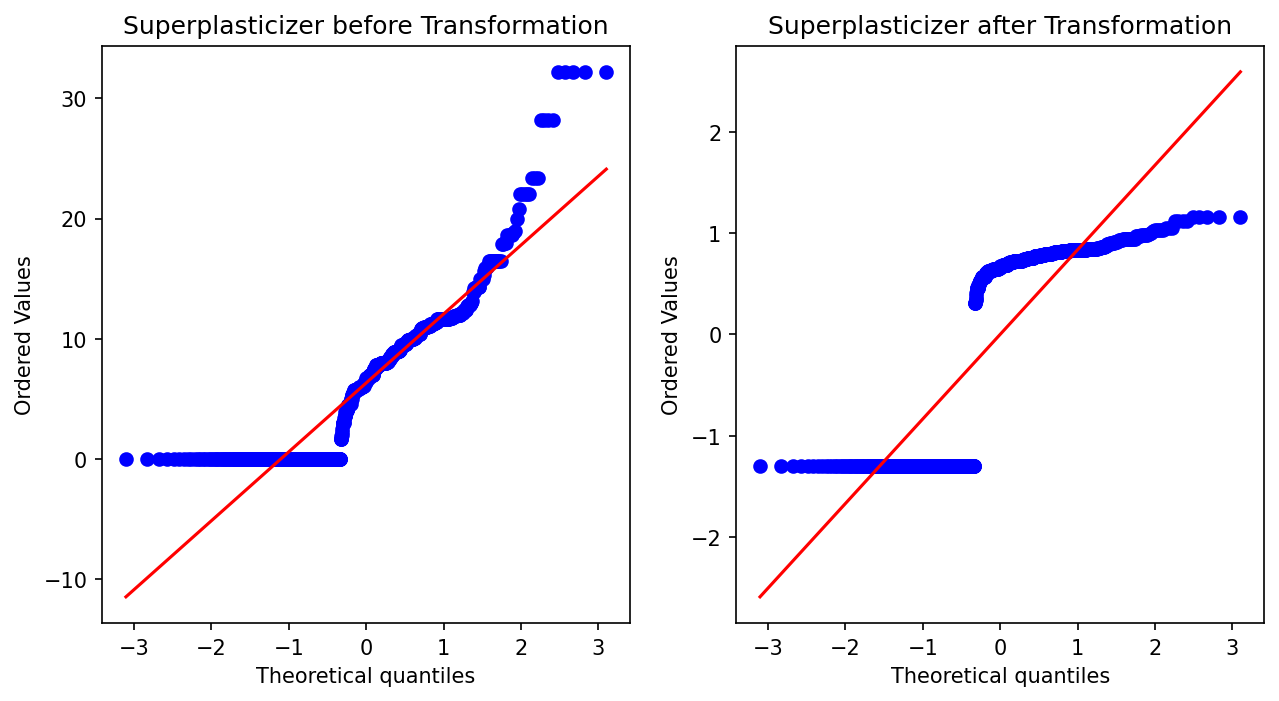

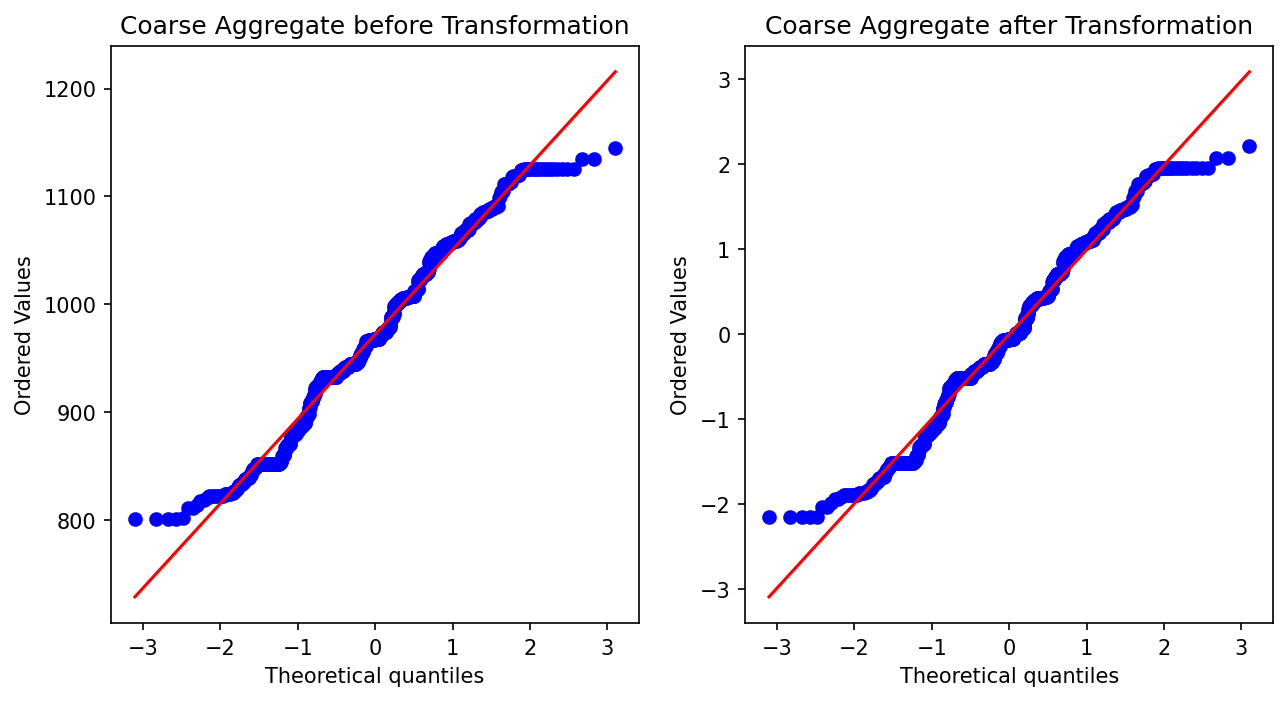

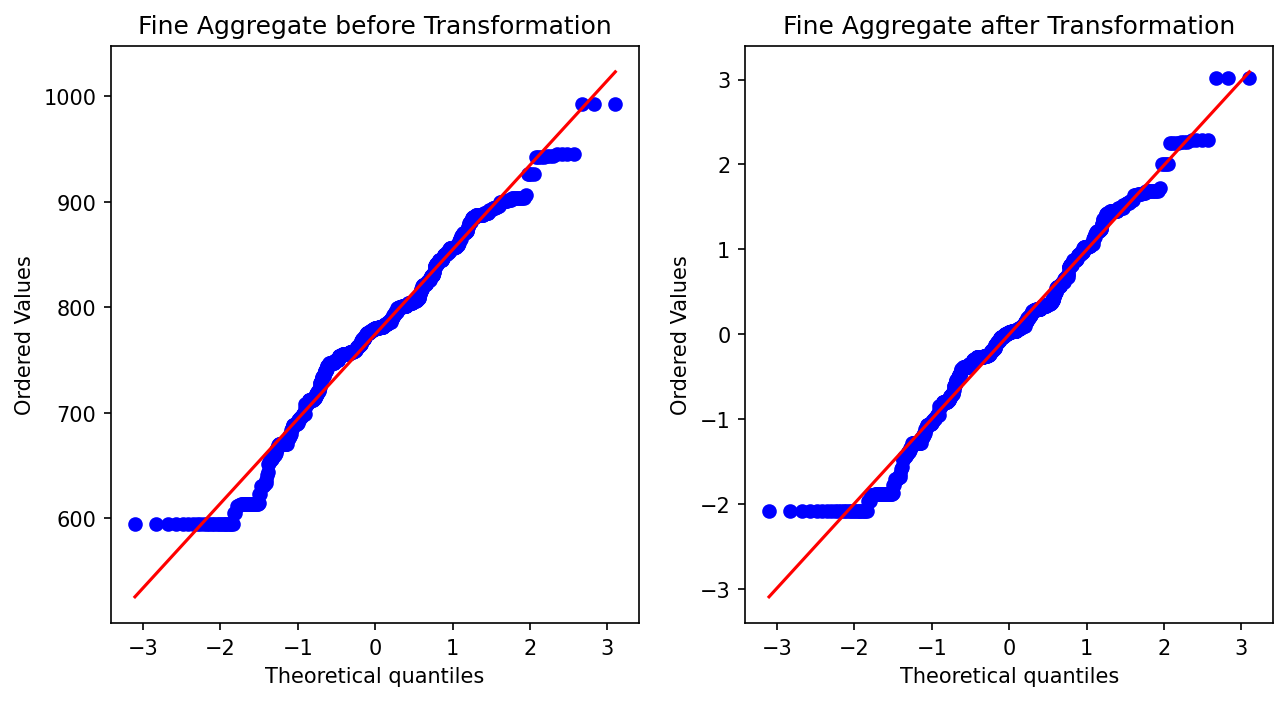

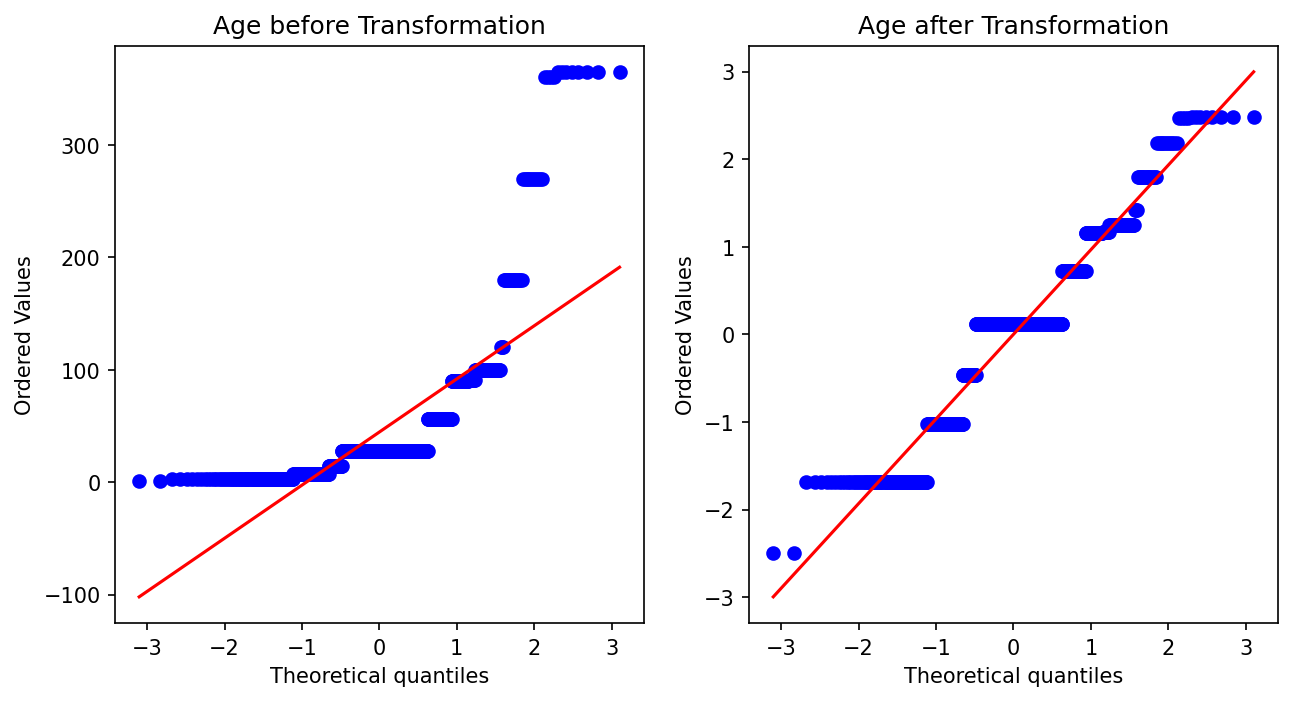

In [38]:
for col in X_train.columns:
    plt.figure(figsize=(10, 5), dpi=150)
    plt.subplot(121)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"{col} before Transformation")

    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(f"{col} after Transformation")
    plt.show()

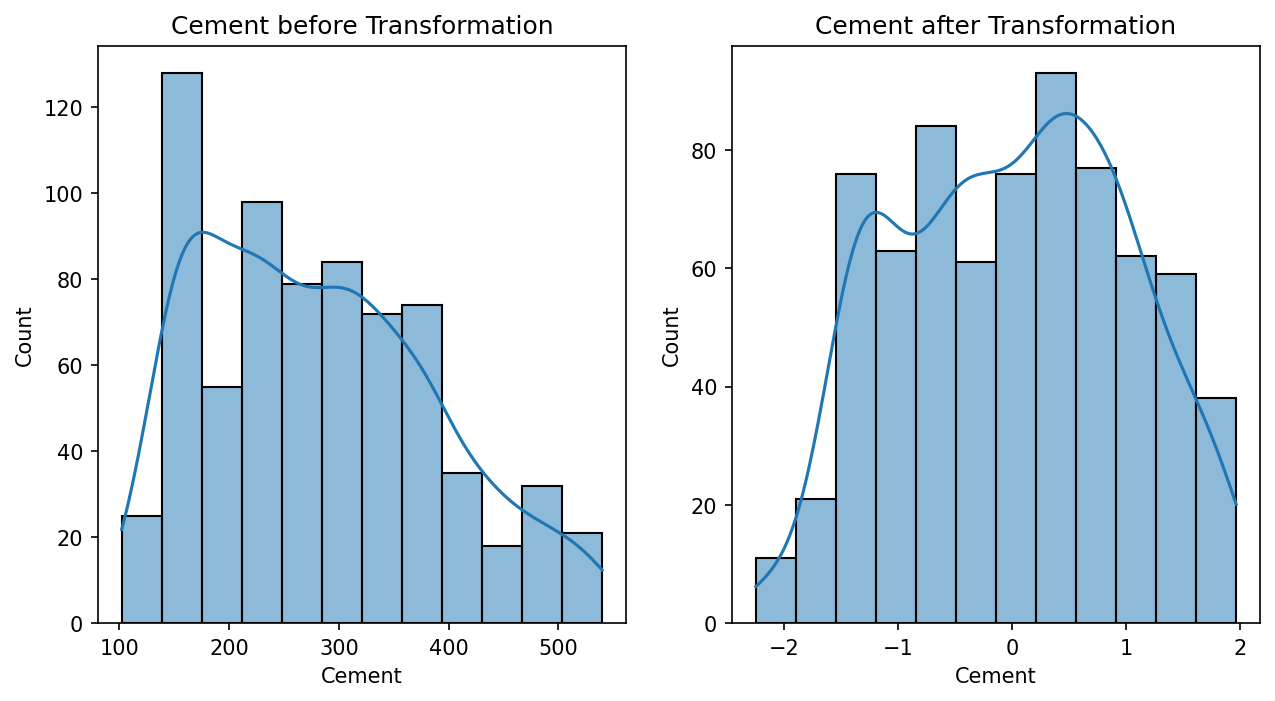

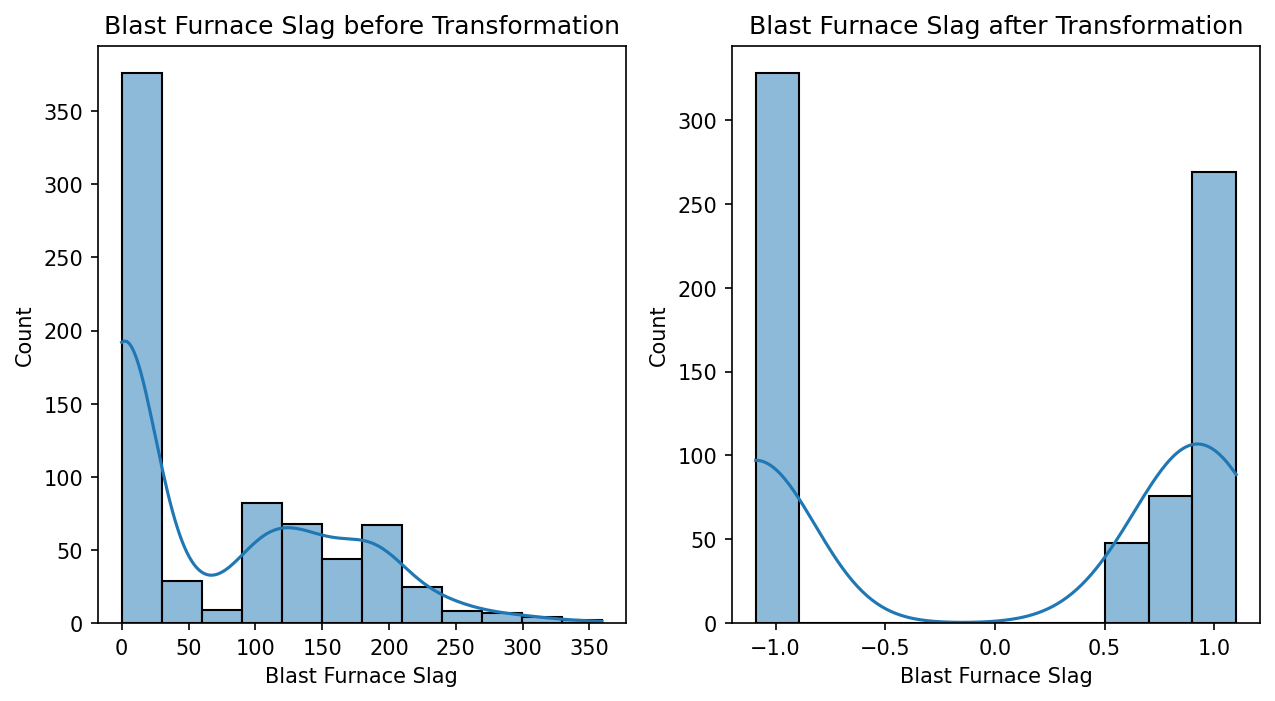

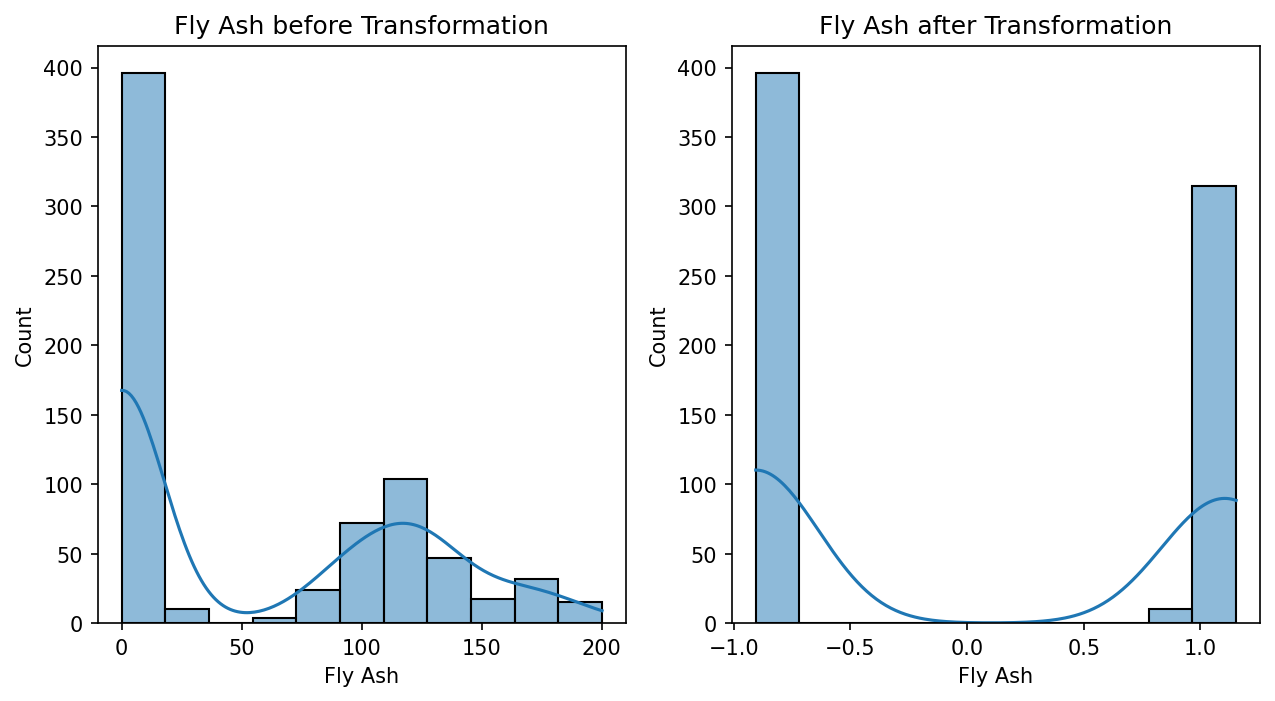

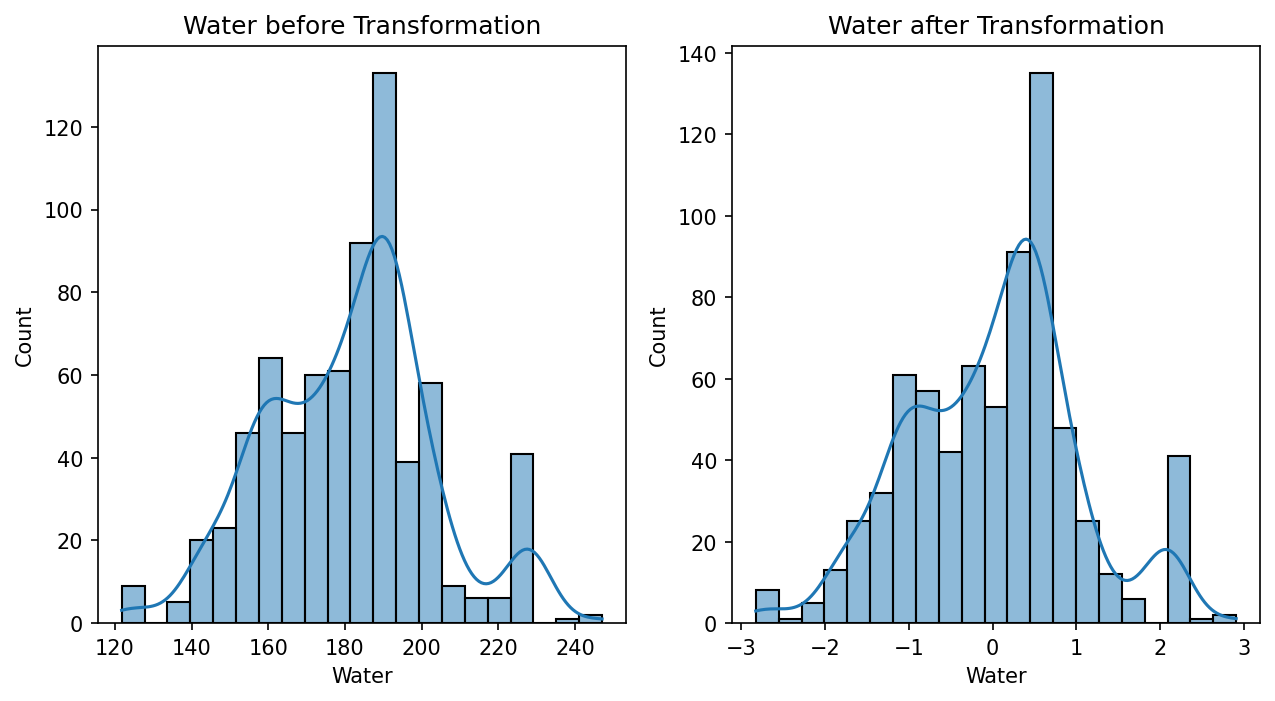

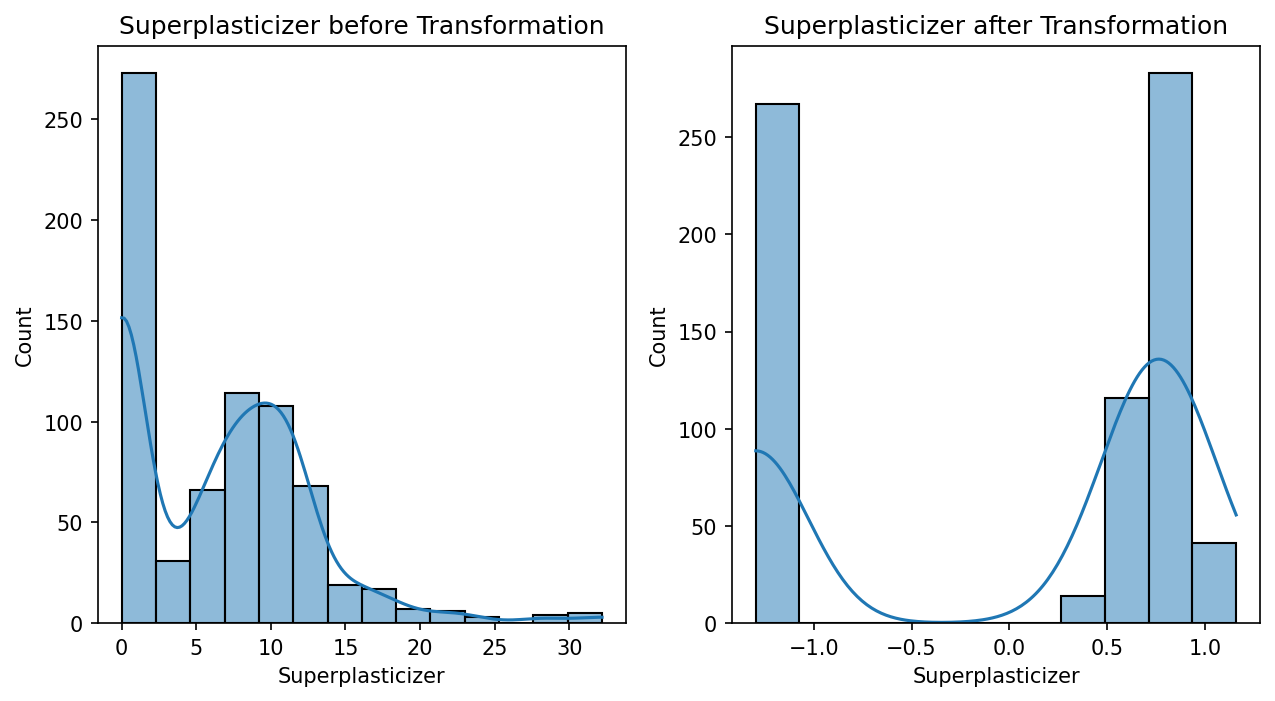

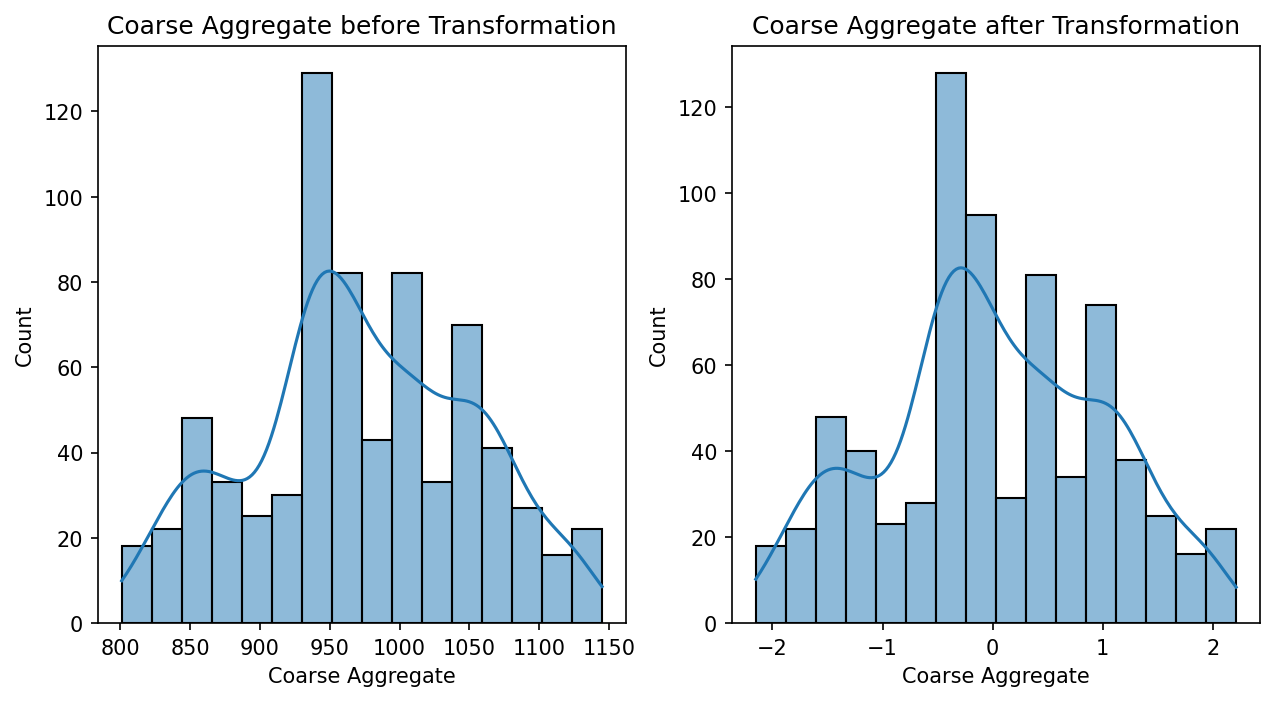

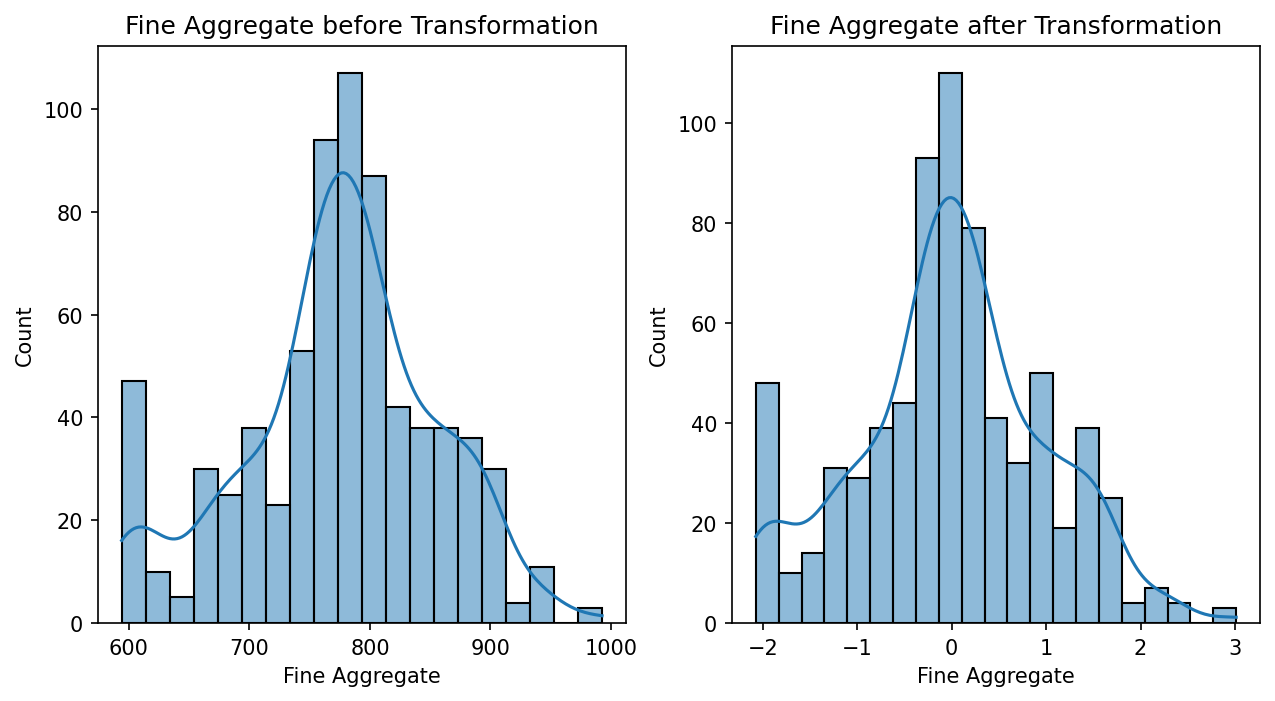

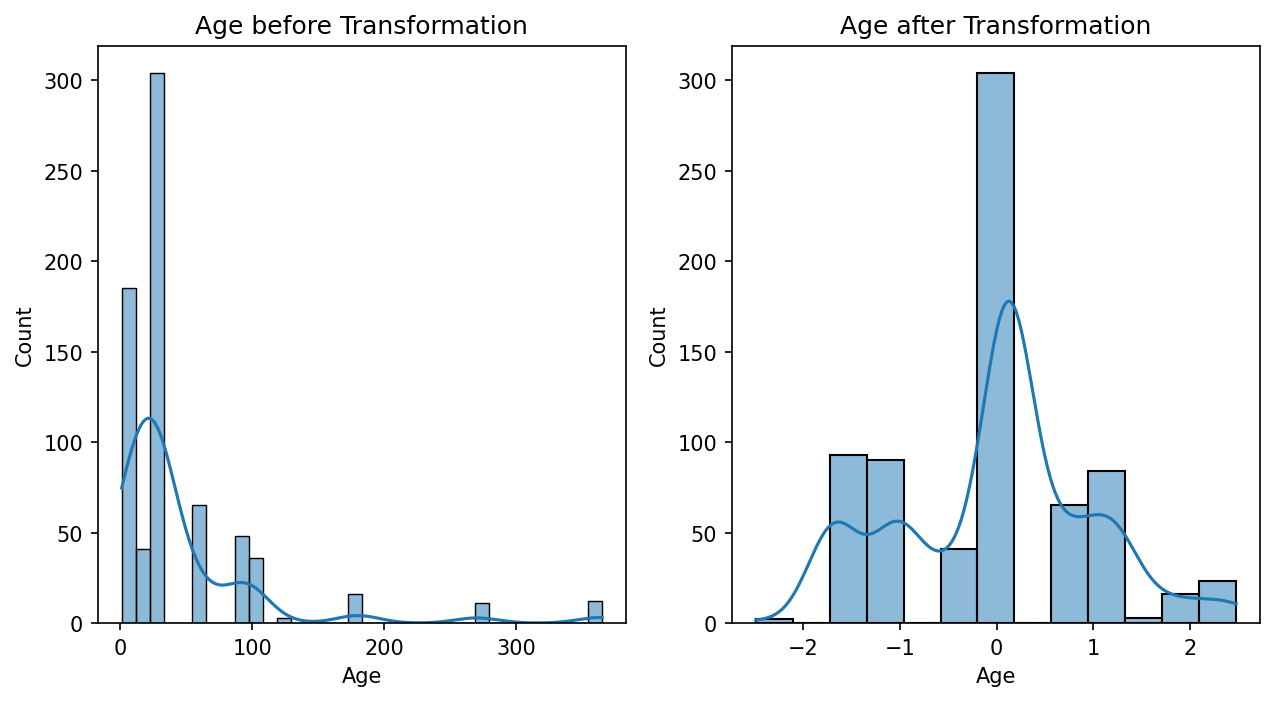

In [37]:
for col in X_train.columns:
    plt.figure(figsize=(10, 5), dpi=150)
    plt.subplot(121)
    plt.title(f"{col} before Transformation")
    sns.histplot(X_train[col], kde=True)

    plt.subplot(122)
    plt.title(f"{col} after Transformation")
    sns.histplot(X_train_transformed[col], kde=True)
    plt.show()

**Using Yeo-Johnson**

In [39]:
yeo_johnson_transformer = PowerTransformer(method="yeo-johnson")

X_train_transformed_yj = yeo_johnson_transformer.fit_transform(X_train)
X_test_transformed_yj = yeo_johnson_transformer.transform(X_test)

lr_yj = LinearRegression()
lr_yj.fit(X_train_transformed_yj, y_train)

y_pred = lr_yj.predict(X_test_transformed_yj)

r2_score(y_test, y_pred=y_pred)

0.8089841082686244

In [42]:
# cross val score

yj = PowerTransformer()
lr4 = LinearRegression()

cvs = cross_val_score(lr, yj.fit_transform(X), y, scoring="r2")
print(f"{cvs}")

np.mean(cvs)

[0.73026967 0.69469076 0.76110355 0.82725833 0.40399026]


np.float64(0.6834625134285748)